In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [15]:
dataset = pd.read_csv('/home/blacker/Downloads/D/house.csv')
print(dataset.shape)

(21613, 21)


In [16]:
print(dataset.describe)

<bound method NDFrame.describe of                id             date      price  bedrooms  bathrooms  \
0      7129300520  20141013T000000   221900.0         3       1.00   
1      6414100192  20141209T000000   538000.0         3       2.25   
2      5631500400  20150225T000000   180000.0         2       1.00   
3      2487200875  20141209T000000   604000.0         4       3.00   
4      1954400510  20150218T000000   510000.0         3       2.00   
5      7237550310  20140512T000000  1225000.0         4       4.50   
6      1321400060  20140627T000000   257500.0         3       2.25   
7      2008000270  20150115T000000   291850.0         3       1.50   
8      2414600126  20150415T000000   229500.0         3       1.00   
9      3793500160  20150312T000000   323000.0         3       2.50   
10     1736800520  20150403T000000   662500.0         3       2.50   
11     9212900260  20140527T000000   468000.0         2       1.00   
12      114101516  20140528T000000   310000.0         3 

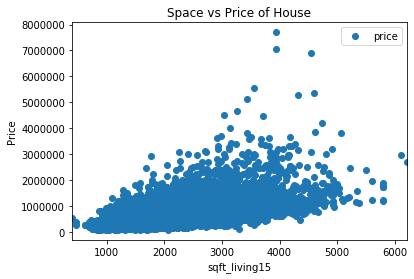

In [17]:
dataset.plot(x='sqft_living15', y='price', style='o')
plt.title('Space vs Price of House')
plt.xlabel('sqft_living15')
plt.ylabel('Price')
plt.show()

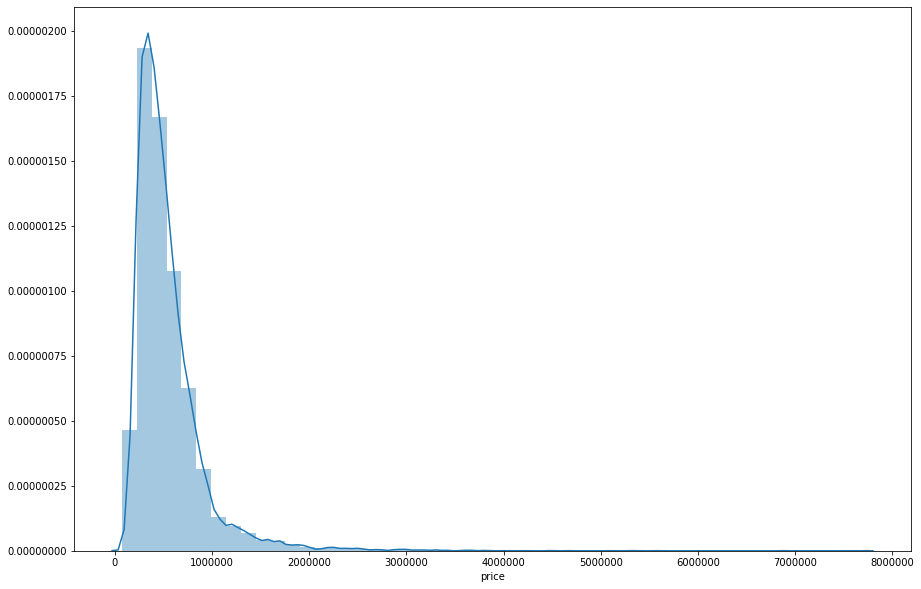

In [18]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['price'])
plt.show()

In [19]:
#data splicing splitting data into training and testing data with 20% to test data
x= dataset['sqft_living15'].values.reshape(-1,1) 
y=dataset['price'].values.reshape(-1,1)
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = 0.2, random_state=0)

 #training the algorithm
regressor = LinearRegression()
regressor.fit(x_train, y_train)

#to retrieve the incercept i.e best value for intercept and slope thus line that best fit the data
#assumption that the co-efficient is the slope
print('Intercept:', regressor.intercept_)
print('Co-efficient:', regressor.coef_)

Intercept: [-86594.44756368]
Co-efficient: [[316.68034186]]


In [20]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted':y_pred.flatten()})
print(df)

         Actual     Predicted
0      297000.0  3.662584e+05
1     1578000.0  1.252963e+06
2      562100.0  3.694252e+05
3      631500.0  4.454285e+05
4      780000.0  6.861056e+05
5      485000.0  4.454285e+05
6      340000.0  5.467662e+05
7      335606.0  7.272740e+05
8      425000.0  6.924392e+05
9      490000.0  7.019396e+05
10     732000.0  6.386035e+05
11     389700.0  4.580957e+05
12     450000.0  3.409240e+05
13     357000.0  5.530998e+05
14     960000.0  7.589421e+05
15     257000.0  3.060892e+05
16     448000.0  4.074269e+05
17     610000.0  3.345904e+05
18     230950.0  3.060892e+05
19     377500.0  3.250900e+05
20     375000.0  2.997556e+05
21     410000.0  4.137605e+05
22     459000.0  5.150982e+05
23     190000.0  3.409240e+05
24     585000.0  6.607712e+05
25     280000.0  3.187564e+05
26     500000.0  3.820925e+05
27     465000.0  3.694252e+05
28     802000.0  5.847679e+05
29     440000.0  4.485953e+05
...         ...           ...
4293  1242000.0  1.107290e+06
4294   411

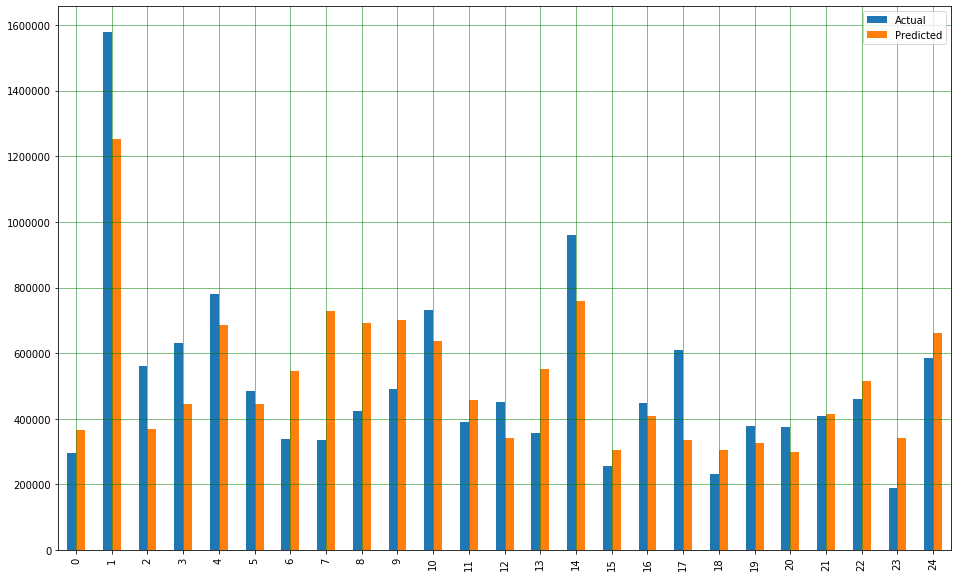

In [21]:
df1= df.head(25)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor',linestyle=':', linewidth='0.5', color='black')
plt.show()

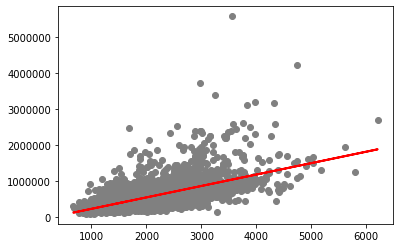

In [22]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 182206.09917317648
Mean Squared Error: 77112590873.13472
Root Mean Squared Error: 277691.53907372605


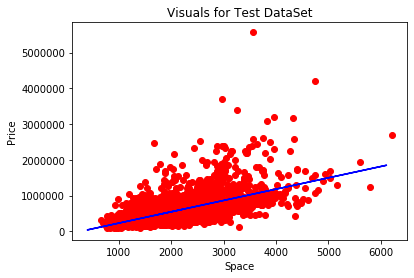

In [24]:
plt.scatter(x_test, y_test, color= 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

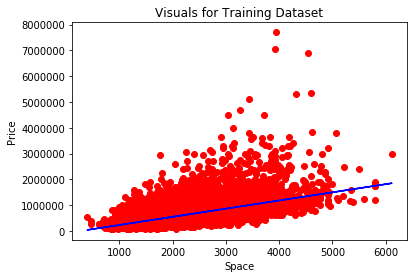

In [25]:
plt.scatter(x_train, y_train, color= 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()
